In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pandas as pd
import numpy as np

In [2]:
#serve per effettuare il montaggio di google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


DATI SU SCAMBIO ENERGETICO NETTO MAGGIO 2021 CON ESTERO

In [ ]:
#dati scambio energetico con estero maggio 2021
net_energy= pd.read_excel('/content/drive/MyDrive/DatasetTesiTirocinio/DatasetTerna/ExporteEnergymaggio2021.xlsx') #dati scambio energetico

In [ ]:
net_energy.head()

Date      Country  Import  Export  \
0  2021-05-31 23:00:00       Greece     0.0     0.0   
1  2021-05-31 23:00:00     Slovenia   383.2     0.0   
2  2021-05-31 23:00:00   Montenegro   585.0     0.0   
3  2021-05-31 23:00:00        Malta     0.0     0.0   
4  2021-05-31 23:00:00  Switzerland  2157.7     0.0   

   Scheduled Foreign Exchange  
0                         0.0  
1                       383.2  
2                       585.0  
3                         0.0  
4                      2157.7

In [ ]:
net_energy.info() #vedo che devo  trasformare date da oggetto a data alivello di tipo di dato

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5954 entries, 0 to 5953
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        5953 non-null   object 
 1   Country                     5952 non-null   object 
 2   Import                      5952 non-null   float64
 3   Export                      5952 non-null   float64
 4   Scheduled Foreign Exchange  5952 non-null   float64
dtypes: float64(3), object(2)
memory usage: 232.7+ KB


In [ ]:
net_energy['Date'] = pd.to_datetime(net_energy['Date'], errors='coerce') #eggettuo la conversione e verifico con info
net_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5954 entries, 0 to 5953
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        5952 non-null   datetime64[ns]
 1   Country                     5952 non-null   object        
 2   Import                      5952 non-null   float64       
 3   Export                      5952 non-null   float64       
 4   Scheduled Foreign Exchange  5952 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 232.7+ KB


In [ ]:
net_energy['day_hours'] = net_energy['Date'].dt.hour #tiro fuori il campo ora per fare un aggregato
net_energy['day'] = net_energy['Date'].dt.day
net_energy.head()

Date      Country  Import  Export  \
0 2021-05-31 23:00:00       Greece     0.0     0.0   
1 2021-05-31 23:00:00     Slovenia   383.2     0.0   
2 2021-05-31 23:00:00   Montenegro   585.0     0.0   
3 2021-05-31 23:00:00        Malta     0.0     0.0   
4 2021-05-31 23:00:00  Switzerland  2157.7     0.0   

   Scheduled Foreign Exchange  day_hours   day  
0                         0.0       23.0  31.0  
1                       383.2       23.0  31.0  
2                       585.0       23.0  31.0  
3                         0.0       23.0  31.0  
4                      2157.7       23.0  31.0

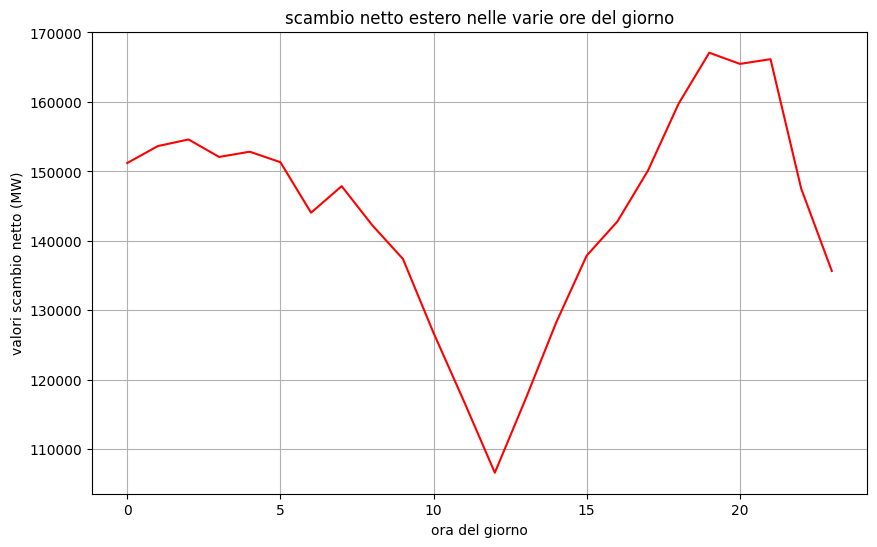

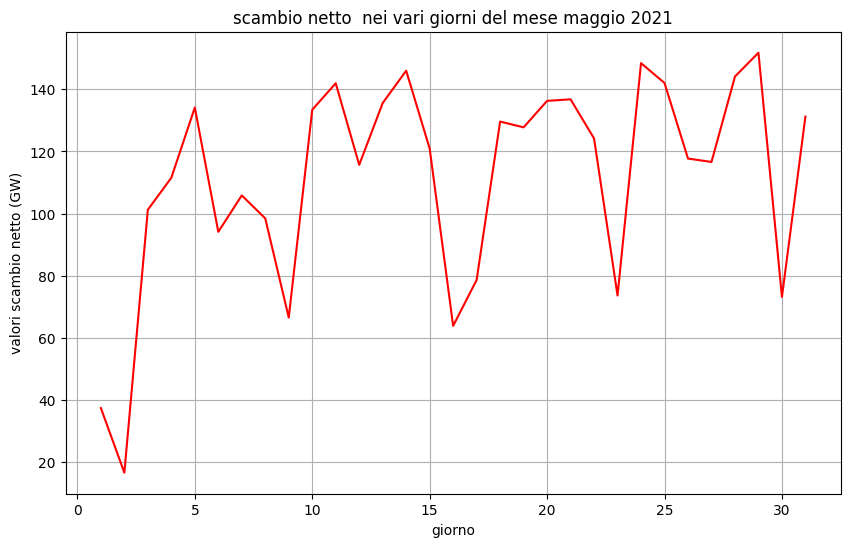

In [ ]:
sum_day_hours = net_energy.groupby('day_hours')['Scheduled Foreign Exchange'].sum()
sum_day = net_energy.groupby('day')['Scheduled Foreign Exchange'].sum()
sum_day=sum_day /1000 # per avere GW e non MW

#day hours
fig, ax = plt.subplots(figsize=(10, 6))
sum_day_hours.plot(ax=ax,color='red')
ax.set_title('scambio netto estero nelle varie ore del giorno')
ax.set_xlabel('ora del giorno')
ax.set_ylabel('valori scambio netto (MW)')
plt.grid(True)
plt.show()

#day
fig, ax = plt.subplots(figsize=(10, 6))
sum_day.plot(ax=ax,color='red')
ax.set_title('scambio netto  nei vari giorni del mese maggio 2021')
ax.set_xlabel('giorno')
ax.set_ylabel('valori scambio netto (GW)')
plt.grid(True)
plt.show()

questo serve per evidenziare che compriamo energia dall'estero

DATI CONSUMO TRA 2019 E 2021

In [4]:
#dati  consumo terna
load = pd.read_excel('/content/drive/MyDrive/DatasetTesiTirocinio/DatasetTerna/ConsumoData.xlsx') #dati consumo

feauture engineering per sistemare i dati perchè alcune il file scaricato da terna è "sporco" a livello di intestazione delle colonne

In [ ]:
load.head() #vedo intestazione sbagliata e poi la correggo

Unnamed: 0       Unnamed: 1                Unnamed: 2
0                  NaN              NaN                       NaN
1                 Date  Total Load (GW)  Forecast Total Load (GW)
2  2019-01-01 00:00:00            24.37                    25.009
3  2019-01-01 00:15:00           24.202                 24.794001
4  2019-01-01 00:30:00           24.142                     24.58

In [5]:
load=load.dropna()
load=load.iloc[1:] #elimino prima riga che non ha preso intetsazione colonne giusta
load=load.rename(columns={"Unnamed: 0":"date","Unnamed: 1":"Total Load (GW)","Unnamed: 2":"Forecast Total Load (GW)"}) #metto la giusta intestazione alle colonne
load.head()

date Total Load (GW) Forecast Total Load (GW)
2  2019-01-01 00:00:00           24.37                   25.009
3  2019-01-01 00:15:00          24.202                24.794001
4  2019-01-01 00:30:00          24.142                    24.58
5  2019-01-01 00:45:00          23.969                24.366001
6  2019-01-01 01:00:00       23.599001                   24.143

In [ ]:
load.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150002 entries, 2 to 150003
Data columns (total 3 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   date                      150002 non-null  object
 1   Total Load (GW)           150002 non-null  object
 2   Forecast Total Load (GW)  150002 non-null  object
dtypes: object(3)
memory usage: 4.6+ MB


In [ ]:
load.describe()

date  Total Load (GW)  Forecast Total Load (GW)
count                150002       150002.000                150002.000
unique               150002        73375.000                 73802.000
top     2019-01-01 00:00:00           27.424                    28.688
freq                      1           14.000                    12.000

ora l'intestazione delle colonne è corretta

ANALISI FABBISOGNO

inizio a vedere la serie temporale di Total load

In [ ]:
#da load ora mi interssa solo il valore total e no quello forecast
tload=load.copy()
tload=tload.drop(['Forecast Total Load (GW)'], axis = 1)
tload['date']=pd.to_datetime(tload['date'], format='%d-%m-%Y %H:%M') #passa da object a datetime
tload=tload.rename(columns={"Total Load (GW)":"tload"}) #la rinomino così per semplicità e praticità

tload.head() #verifico esattezza dell'operazione

date      tload
2 2019-01-01 00:00:00      24.37
3 2019-01-01 00:15:00     24.202
4 2019-01-01 00:30:00     24.142
5 2019-01-01 00:45:00     23.969
6 2019-01-01 01:00:00  23.599001

In [9]:
#prendo altra copia dove tengo anche la previsione per fare un cppnfronto con il modello della serie temporae che uso poi con gretl
prev_load=load.copy()

prev_load['date']=pd.to_datetime(prev_load['date'], format='%d-%m-%Y %H:%M') #passa da object a datetime
prev_load=prev_load.rename(columns={"Total Load (GW)":"TERNA_real_load"}) #la rinomino così per semplicità e praticità
prev_load=prev_load.rename(columns={"Forecast Total Load (GW)":"TERNA_prev_load"}) #la rinomino così per semplicità e praticità

prev_load.head()

date TERNA_real_load TERNA_prev_load
2 2019-01-01 00:00:00           24.37          25.009
3 2019-01-01 00:15:00          24.202       24.794001
4 2019-01-01 00:30:00          24.142           24.58
5 2019-01-01 00:45:00          23.969       24.366001
6 2019-01-01 01:00:00       23.599001          24.143

In [ ]:
tload.info() #verifico date che sia datetime

<class 'pandas.core.frame.DataFrame'>
Index: 150002 entries, 2 to 150003
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    150002 non-null  datetime64[ns]
 1   tload   150002 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 3.4+ MB


<ipython-input-9-0f6af6888788>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tload["tload"], bins = 20, kde = True)


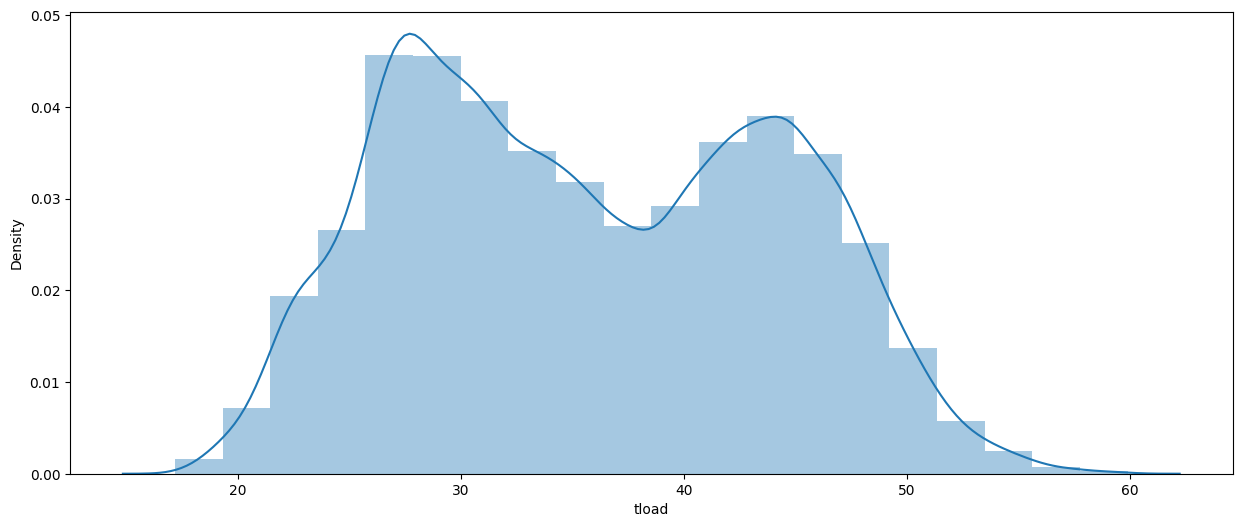

In [ ]:
#distribuzione di Total Load (GW)
plt.figure(figsize=(15,6))
sns.distplot(tload["tload"], bins = 20, kde = True)
plt.show()

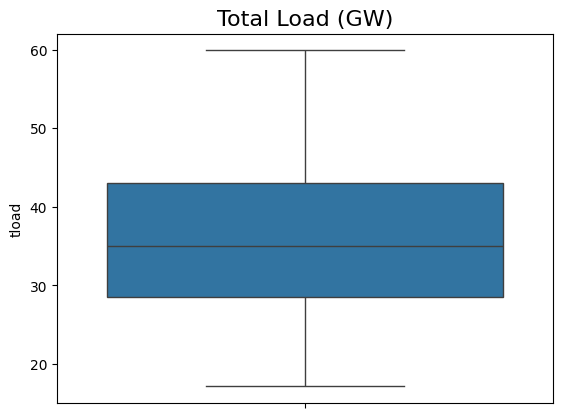

In [ ]:
box_plot  = plt.subplots()
box_plot = sns.boxplot(tload["tload"])
plt.title("Total Load (GW)", size=16)
plt.show()

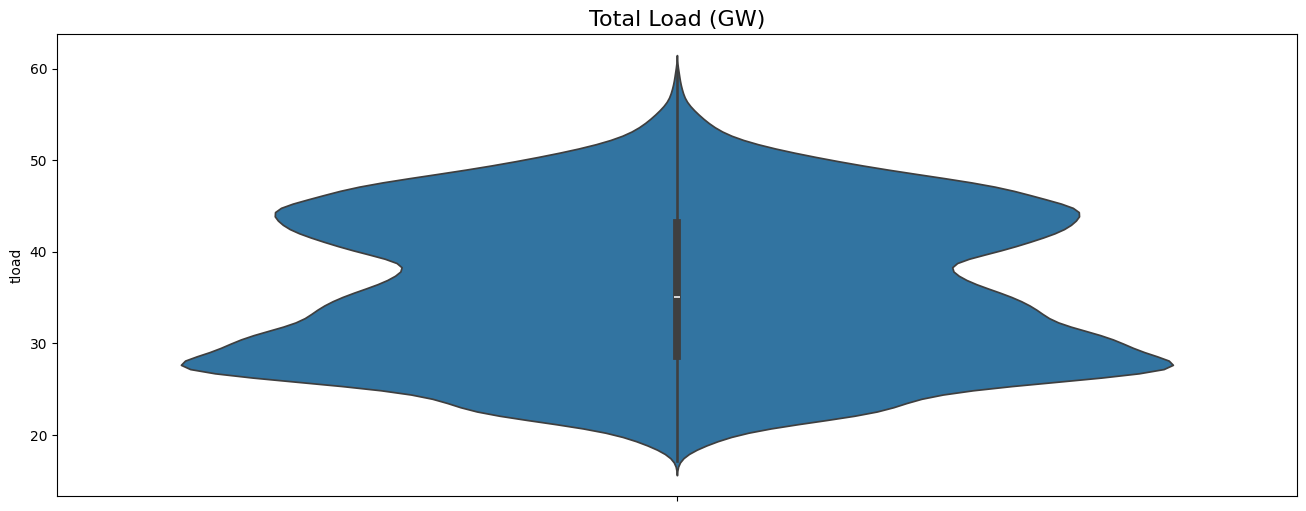

In [ ]:
plt.figure(figsize=(16, 6))
sns.violinplot(tload["tload"])
plt.title("Total Load (GW)", size=16)
plt.show()

<Figure size 2500x10000 with 0 Axes>

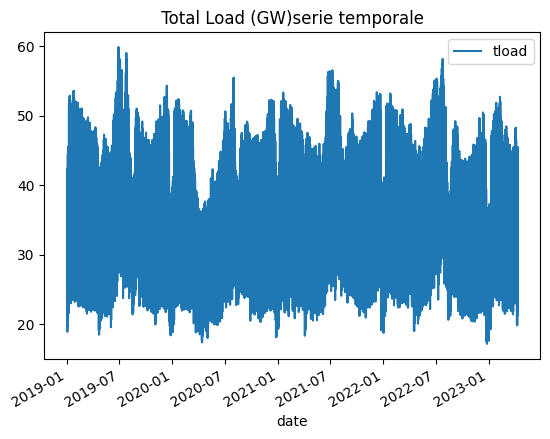

In [ ]:
plt.figure(figsize=(25,100))
tload.plot(x='date', y='tload',  title=" Total Load (GW)serie temporale ")
#plt.tight_layout()
plt.show()

In [ ]:
tload['day_hours'] = tload['date'].dt.hour #salvo qui varie info sul tempo
tload['day'] = tload['date'].dt.day
tload['month'] = tload['date'].dt.month
tload.head()

date      tload  day_hours  day  month
2 2019-01-01 00:00:00      24.37          0    1      1
3 2019-01-01 00:15:00     24.202          0    1      1
4 2019-01-01 00:30:00     24.142          0    1      1
5 2019-01-01 00:45:00     23.969          0    1      1
6 2019-01-01 01:00:00  23.599001          1    1      1

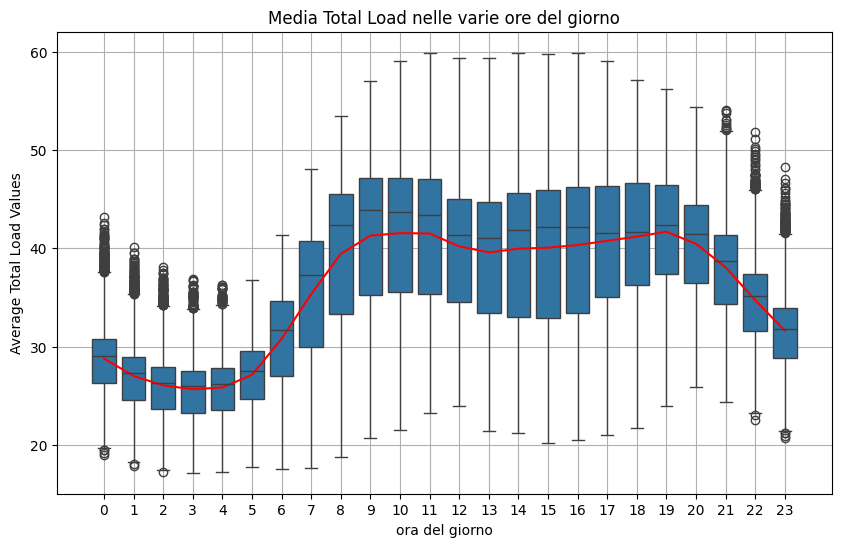

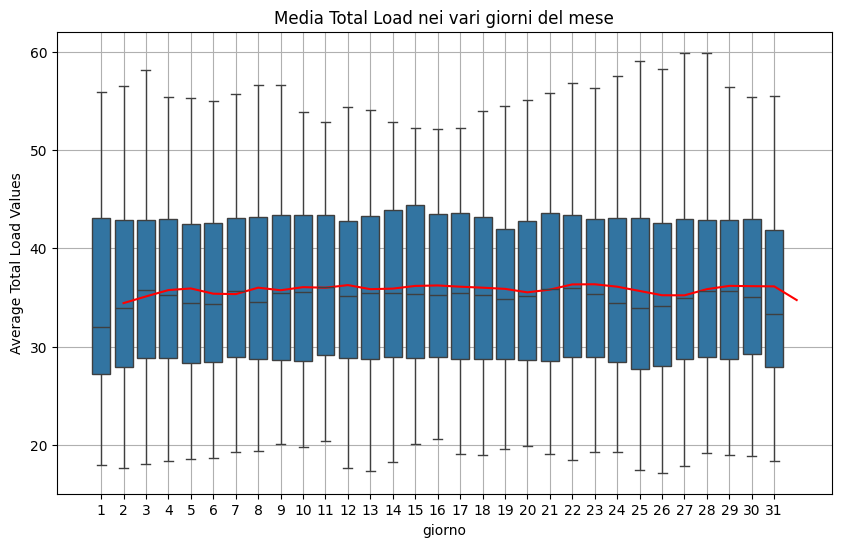

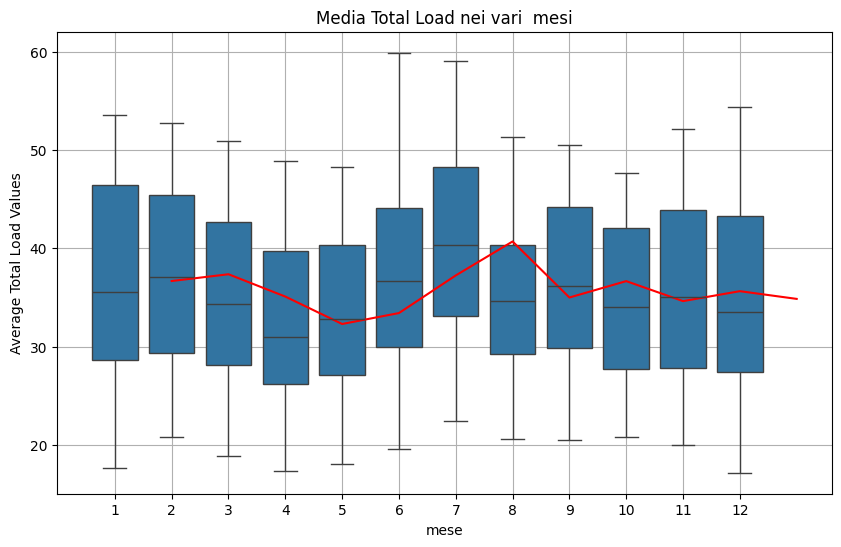

In [ ]:
#calcolo le medie per valori aggregati
mean_day_hours = tload.groupby('day_hours')['tload'].mean()
mean_day = tload.groupby('day')['tload'].mean()
mean_month = tload.groupby('month')['tload'].mean()

#ora faccio il plotting

#day hours
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=tload, x='day_hours', y='tload', ax=ax)
mean_day_hours.plot(ax=ax,color='red')
ax.set_title('Media Total Load nelle varie ore del giorno')
ax.set_xlabel('ora del giorno')
ax.set_ylabel('Average Total Load Values')
plt.grid(True)
plt.show()

#day
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=tload, x='day', y='tload', ax=ax)
mean_day.plot(ax=ax,color='red')
ax.set_title('Media Total Load nei vari giorni del mese')
ax.set_xlabel('giorno')
ax.set_ylabel('Average Total Load Values')
plt.grid(True)
plt.show()

#month
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=tload, x='month', y='tload', ax=ax)
mean_month.plot(ax=ax,color='red')
ax.set_title('Media Total Load nei vari  mesi')
ax.set_xlabel('mese')
ax.set_ylabel('Average Total Load Values')
plt.grid(True)
plt.show()


decomposizione serie temporale nelle varie componenti

mi creo un nuovo df "serie" dove poi faccio setindex sulla colonna date

In [ ]:
#setto un index sul datetime
l=tload['tload']
d=tload['date']
serie=pd.concat([d,l],axis=1)
serie.head()

date      tload
2 2019-01-01 00:00:00      24.37
3 2019-01-01 00:15:00     24.202
4 2019-01-01 00:30:00     24.142
5 2019-01-01 00:45:00     23.969
6 2019-01-01 01:00:00  23.599001

In [ ]:
serie.set_index('date', inplace=True)
serie.head() #per vedere graficamente il nuovo indice nel df

tload
date                          
2019-01-01 00:00:00      24.37
2019-01-01 00:15:00     24.202
2019-01-01 00:30:00     24.142
2019-01-01 00:45:00     23.969
2019-01-01 01:00:00  23.599001

nella cella successiva scarico il file pulito a livello di intestazione per fare ulteriori analisi con gretl

In [ ]:
#download on your local machine

serie.to_csv('TimeSeriesLoad.csv') #name of the new file on your machine
from google.colab import files
files.download("TimeSeriesLoad.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

faccio la stessa cosa per il dataframe prev_load dove poi faccio previsioni su gretl e confronto del mio modello con quello terna

In [12]:
r=prev_load['TERNA_real_load'] #consumo reale
p=prev_load['TERNA_prev_load'] #previsione terna
d=prev_load['date'] #data
dati=pd.concat([d,r,p],axis=1) #li metto tutti insieme
dati.head()

date TERNA_real_load TERNA_prev_load
2 2019-01-01 00:00:00           24.37          25.009
3 2019-01-01 00:15:00          24.202       24.794001
4 2019-01-01 00:30:00          24.142           24.58
5 2019-01-01 00:45:00          23.969       24.366001
6 2019-01-01 01:00:00       23.599001          24.143

In [13]:
dati.set_index('date', inplace=True)
dati.head() #per vedere graficamente il nuovo indice nel df

TERNA_real_load TERNA_prev_load
date                                               
2019-01-01 00:00:00           24.37          25.009
2019-01-01 00:15:00          24.202       24.794001
2019-01-01 00:30:00          24.142           24.58
2019-01-01 00:45:00          23.969       24.366001
2019-01-01 01:00:00       23.599001          24.143

In [14]:
#download

dati.to_csv('DataSeriesLoad.csv') #name of the new file on your machine
from google.colab import files
files.download("DataSeriesLoad.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

modello additivo


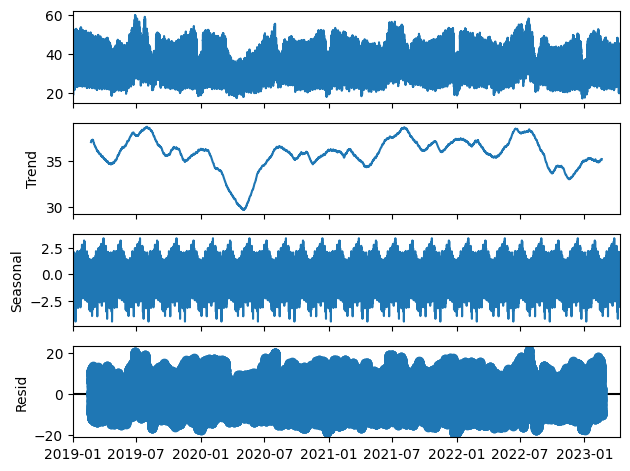

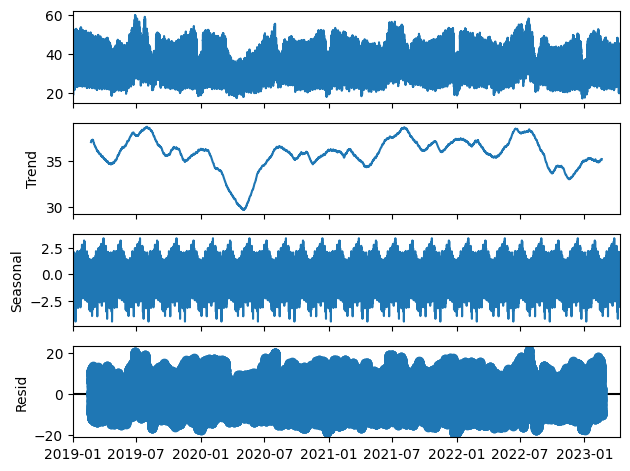

In [ ]:
decomposition = sm.tsa.seasonal_decompose(serie,model='additive', period=10000 ) #fa la decomposizione e posso variare il param
decomposition.plot() #plot tutti output

di seguito in maggior dettaglio plot delle singole componenti

<Axes: title={'center': 'residui'}, xlabel='date'>

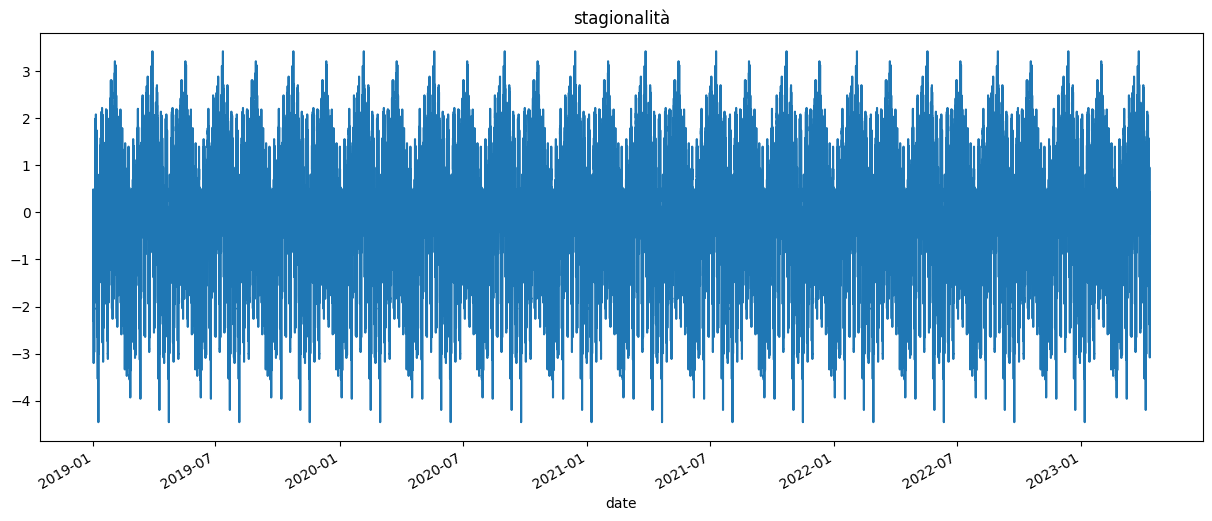

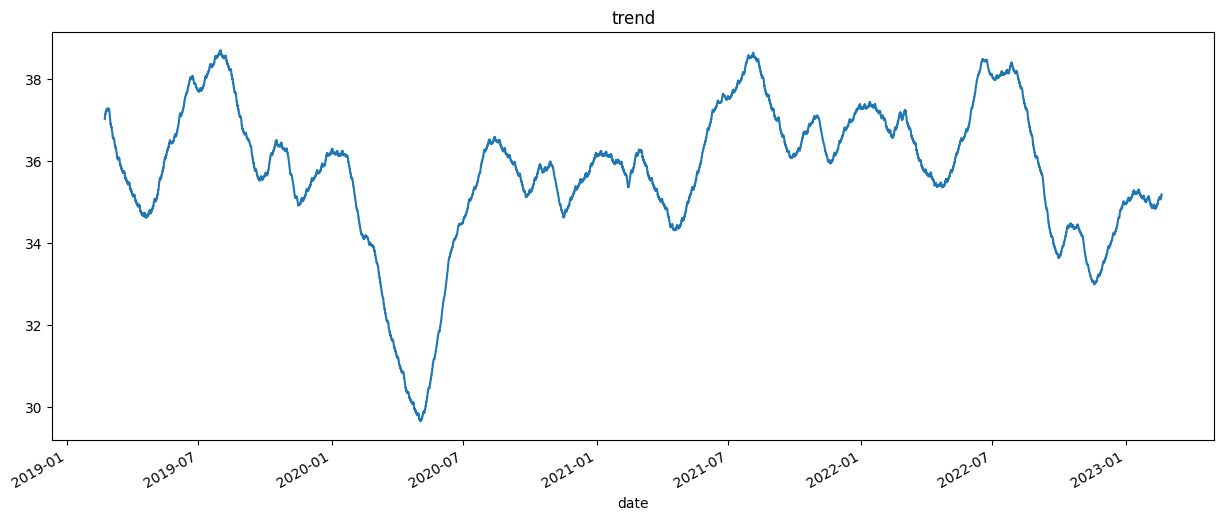

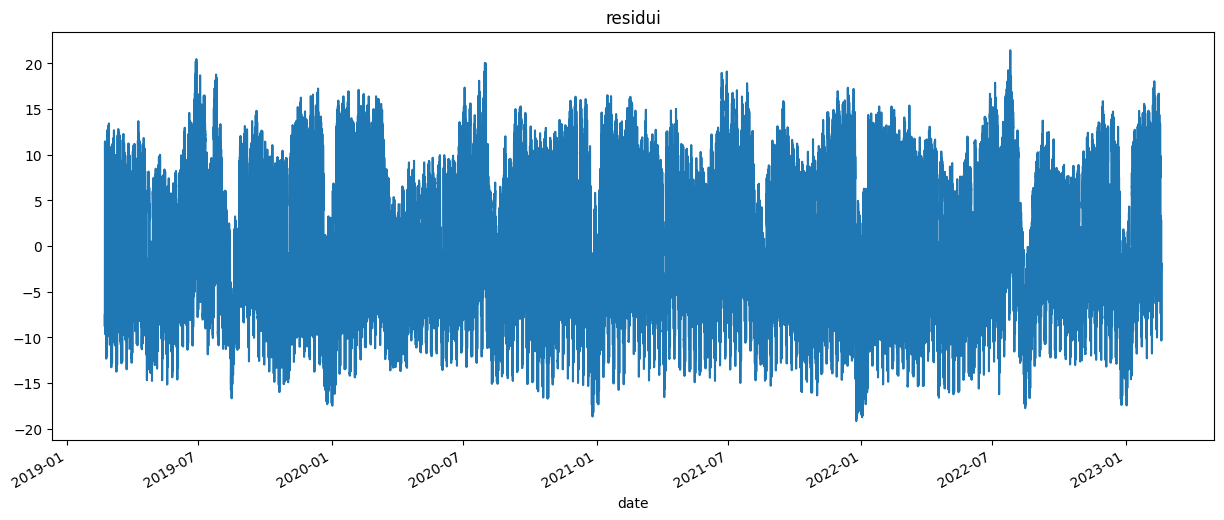

In [ ]:
#seasonal
plt.figure(figsize=(15,6))
plt.title('stagionalità')
decomposition.seasonal.plot()

#trend
plt.figure(figsize=(15,6))
plt.title('trend')
decomposition.trend.plot()

#residual
plt.figure(figsize=(15,6))
plt.title('residui')
decomposition.resid.plot()

modello moltiplicativo

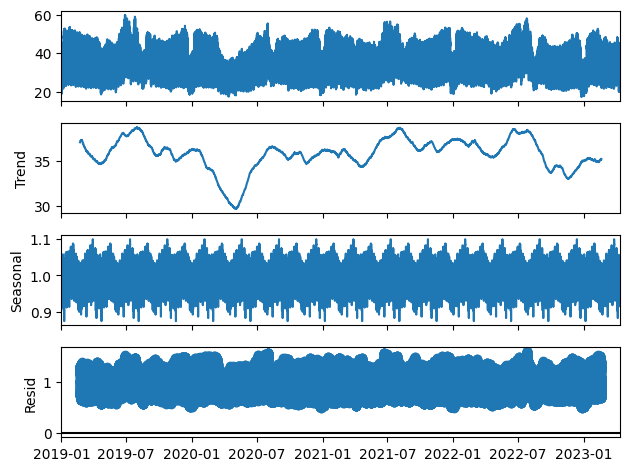

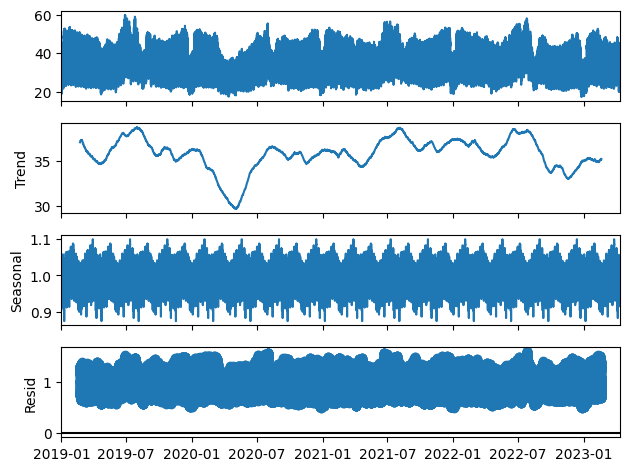

In [ ]:
dec=sm.tsa.seasonal_decompose(serie,model='multiplicative', period=10000 )
dec.plot()

di seguito in maggior dettaglio plot delle singole componenti

<Axes: title={'center': 'residui'}, xlabel='date'>

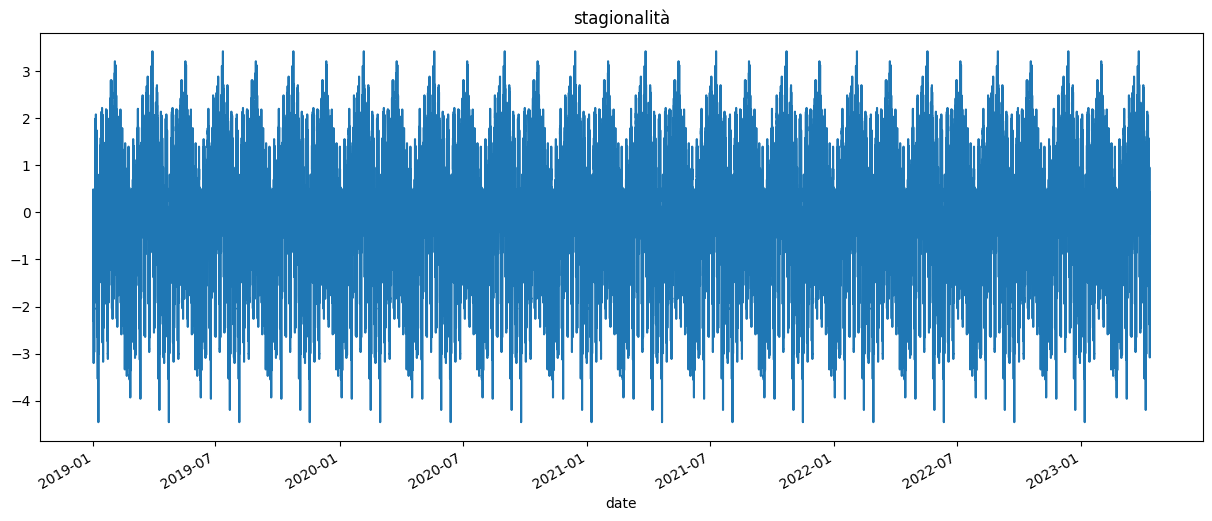

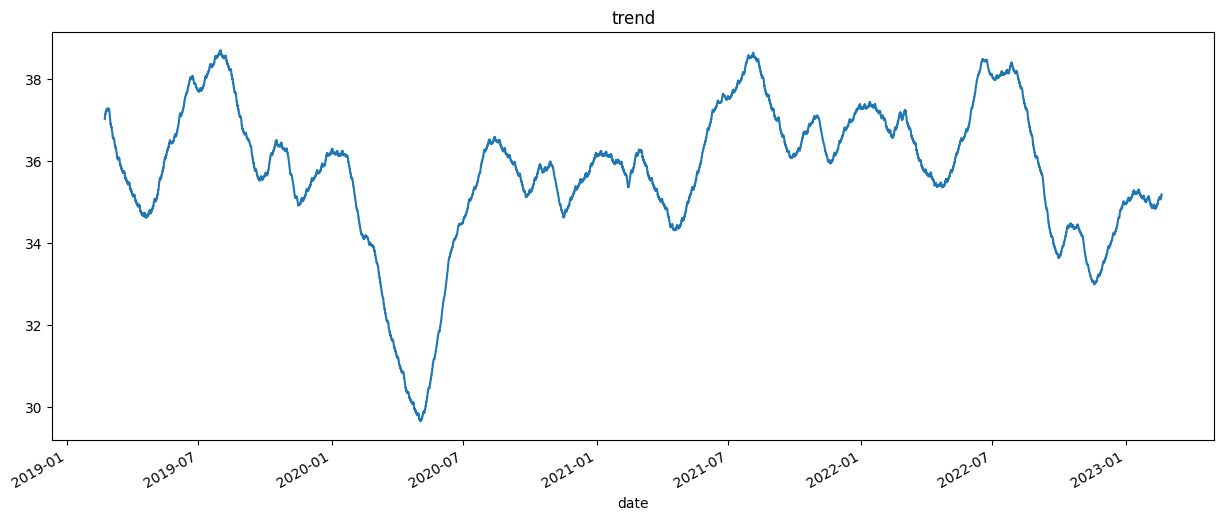

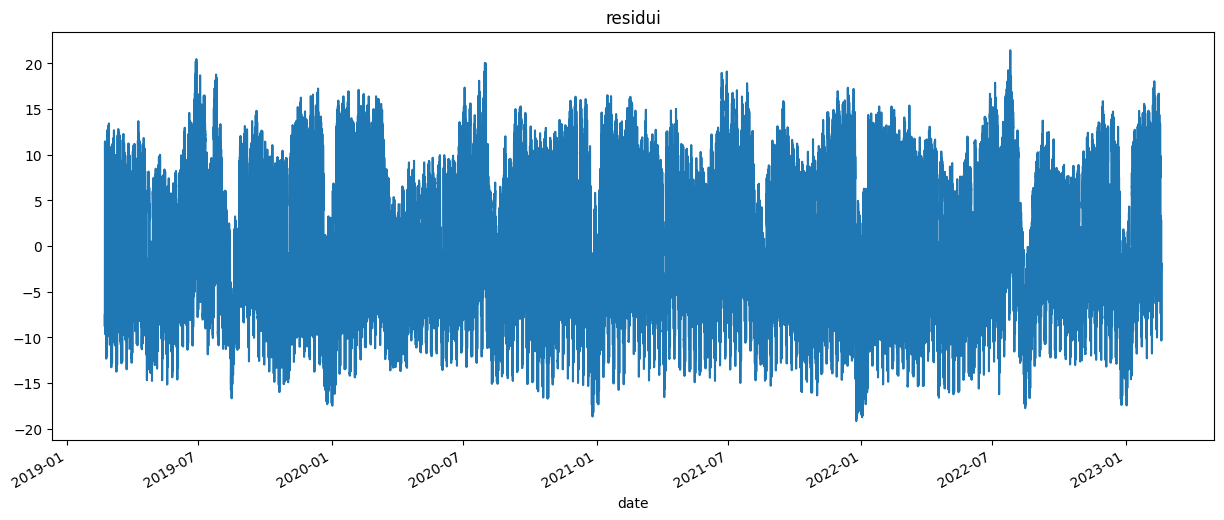

In [ ]:
#seasonal
plt.figure(figsize=(15,6))
plt.title('stagionalità')
decomposition.seasonal.plot()

#trend
plt.figure(figsize=(15,6))
plt.title('trend')
decomposition.trend.plot()

#residual
plt.figure(figsize=(15,6))
plt.title('residui')
decomposition.resid.plot()


Ora parte di analisi delle serie storiche con appositi algoritmi di TSA eseguita su GRETL con modelli ARIMA dopo aver salvato il file sulla macchina locale

ANALISI PRODUZIONE

riprendo parte della stessa analisi sui dati riguardanti la generazione di enrgia in base alle fonti

In [ ]:
#dati generazione terna
gen = pd.read_excel('/content/drive/MyDrive/DatasetTesiTirocinio/DatasetTerna/FontiProduzioneData.xlsx') #dati generazione

In [ ]:
gen=gen.iloc[2:] #elimino prima riga che non ha preso intetsazione colonne
gen=gen.rename(columns={"Applied filters:\nFILTER is 1":"date","Unnamed: 1":"produzione (GW)","Unnamed: 2":"fonte"}) #giusta intestazione
gen.head()

date produzione (GW)             fonte
2  2019-01-01 00:00:00           13.35           Thermal
3  2019-01-01 00:00:00           1.582  Self-consumption
4  2019-01-01 00:00:00               0      Photovoltaic
5  2019-01-01 00:00:00            2.06             Hydro
6  2019-01-01 00:00:00             5.1              Wind

In [ ]:
#download on your local machine

gen.to_csv('TimeSeriesGen.csv') #name of the new file on your machine
from google.colab import files
files.download("TimeSeriesGen.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

ulteriore analisi su questi dati è stata realizzata con tableau


DATA MANIPULATION
di seguito voglio dati aggrgati per ulteriori analisi e grafici


In [ ]:
gen_aggr = gen.groupby('date').sum() #fa la somma per data
gen_aggr=gen_aggr.drop(['fonte'], axis = 1) #elimino info aggregate sulla fonte perchè mi intressa il tot prodotto
gen_aggr=gen_aggr.rename(columns={"produzione (GW)":"tot_prod(GW)"}) #la rinomino così per semplicità e praticità
gen_aggr.head()
#gen_aggr.head()

tot_prod(GW)
date                            
2019-01-01 00:00:00       22.762
2019-01-01 01:00:00       22.081
2019-01-01 02:00:00       21.272
2019-01-01 03:00:00       19.205
2019-01-01 04:00:00        18.95

In [ ]:
PV_gen = gen.where(gen.fonte=='Photovoltaic')
PV_gen=PV_gen.dropna()
PV_gen=PV_gen.drop(['fonte'], axis = 1)
PV_gen=PV_gen.rename(columns={"produzione (GW)":"PV_prod(GW)"}) #la rinomino così per semplicità e praticità
PV_gen.head() #ok



date PV_prod(GW)
4   2019-01-01 00:00:00           0
10  2019-01-01 01:00:00           0
16  2019-01-01 02:00:00           0
22  2019-01-01 03:00:00           0
28  2019-01-01 04:00:00           0

In [ ]:
gen_aggr.drop(index=gen_aggr.index[-1],axis=0,inplace=True)
print(gen_aggr.count())
print(PV_gen.count())
#ora i df hanno lo stesso num di righe

tot_prod(GW)    25000
dtype: int64
date           25000
PV_prod(GW)    25000
dtype: int64


In [ ]:
PV_gen.set_index('date', inplace=True)
PV_gen.head()

/usr/local/lib/python3.11/dist-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


PV_prod(GW)
date                           
2019-01-01 00:00:00           0
2019-01-01 01:00:00           0
2019-01-01 02:00:00           0
2019-01-01 03:00:00           0
2019-01-01 04:00:00           0

faccio stesso procedimento con altre fonti

Thermal

In [ ]:
Thermal_gen = gen.where(gen.fonte=='Thermal')
Thermal_gen=Thermal_gen.dropna()
Thermal_gen=Thermal_gen.drop(['fonte'], axis = 1)
Thermal_gen=Thermal_gen.rename(columns={"produzione (GW)":"Thermal_prod(GW)"}) #la rinomino così per semplicità e praticità
#Thermal_gen.head() #ok
Thermal_gen.drop(index=Thermal_gen.index[-1],axis=0,inplace=True)
print(Thermal_gen.count()) #servono 25oo righe per avere merge fattibile in base ad altri dati
Thermal_gen.set_index('date', inplace=True)
Thermal_gen.head()

date                25000
Thermal_prod(GW)    25000
dtype: int64


/usr/local/lib/python3.11/dist-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


Thermal_prod(GW)
date                                
2019-01-01 00:00:00            13.35
2019-01-01 01:00:00            13.09
2019-01-01 02:00:00            12.42
2019-01-01 03:00:00             10.7
2019-01-01 04:00:00            10.39

Self-consumption

In [ ]:
sc_gen = gen.where(gen.fonte=='Self-consumption')
sc_gen=sc_gen.dropna()
sc_gen=sc_gen.drop(['fonte'], axis = 1)
sc_gen=sc_gen.rename(columns={"produzione (GW)":"Self-consumption(GW)"}) #la rinomino così per semplicità e praticità
sc_gen.drop(index=sc_gen.index[-1],axis=0,inplace=True)
print(sc_gen.count())
sc_gen.set_index('date', inplace=True)
sc_gen.head()

date                    25000
Self-consumption(GW)    25000
dtype: int64


/usr/local/lib/python3.11/dist-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


Self-consumption(GW)
date                                    
2019-01-01 00:00:00                1.582
2019-01-01 01:00:00                1.541
2019-01-01 02:00:00                1.452
2019-01-01 03:00:00                1.235
2019-01-01 04:00:00                  1.2

Hydro

In [ ]:
hydro_gen = gen.where(gen.fonte=='Hydro')
hydro_gen=hydro_gen.dropna()
hydro_gen=hydro_gen.drop(['fonte'], axis = 1)
hydro_gen=hydro_gen.rename(columns={"produzione (GW)":"hydro(GW)"}) #la rinomino così per semplicità e praticità

#sc_gen.drop(index=sc_gen.index[-1],axis=0,inplace=True)
print(hydro_gen.count())
hydro_gen.set_index('date', inplace=True)
hydro_gen.head()

date         25000
hydro(GW)    25000
dtype: int64


/usr/local/lib/python3.11/dist-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


hydro(GW)
date                         
2019-01-01 00:00:00      2.06
2019-01-01 01:00:00      1.75
2019-01-01 02:00:00      1.67
2019-01-01 03:00:00      1.48
2019-01-01 04:00:00      1.48

Wind

In [ ]:
wind_gen = gen.where(gen.fonte=='Wind')
wind_gen=wind_gen.dropna()
wind_gen=wind_gen.drop(['fonte'], axis = 1)
wind_gen=wind_gen.rename(columns={"produzione (GW)":"wind_(GW)"}) #la rinomino così per semplicità e praticità

#wind_gen.drop(index=sc_gen.index[-1],axis=0,inplace=True)
print(wind_gen.count())
wind_gen.set_index('date', inplace=True)
wind_gen.head()

date         25000
wind_(GW)    25000
dtype: int64


/usr/local/lib/python3.11/dist-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


wind_(GW)
date                         
2019-01-01 00:00:00       5.1
2019-01-01 01:00:00      5.03
2019-01-01 02:00:00      5.06
2019-01-01 03:00:00      5.12
2019-01-01 04:00:00      5.21

Geothermal

In [ ]:
geot_gen = gen.where(gen.fonte=='Geothermal')
geot_gen=geot_gen.dropna()
geot_gen=geot_gen.drop(['fonte'], axis = 1)
geot_gen=geot_gen.rename(columns={"produzione (GW)":"Geothermal(GW)"}) #la rinomino così per semplicità e praticità

#wind_gen.drop(index=sc_gen.index[-1],axis=0,inplace=True)
print(geot_gen.count())
geot_gen.set_index('date', inplace=True)
geot_gen.head()

date              25000
Geothermal(GW)    25000
dtype: int64


/usr/local/lib/python3.11/dist-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


Geothermal(GW)
date                              
2019-01-01 00:00:00           0.67
2019-01-01 01:00:00           0.67
2019-01-01 02:00:00           0.67
2019-01-01 03:00:00           0.67
2019-01-01 04:00:00           0.67

adesso faccio il merge di tutti i dati

In [ ]:
#prendo tutti questi dati aggregati e li unisco in un unico dataset
# per evitare errore "merge() got multiple values for argument 'on'" devo fare un passaggio ricorsivo

#merged_data_gen = pd.merge(gen_aggr, PV_gen,Thermal_gen,sc_gen,hydro_gen ,wind_gen,geot_gen,on=['date']) #segnala errore

merged_data_gen = pd.merge(gen_aggr, PV_gen, on=['date'])
merged_data_gen = pd.merge(merged_data_gen, Thermal_gen, on=['date'])
merged_data_gen = pd.merge(merged_data_gen, sc_gen, on=['date'])
merged_data_gen = pd.merge(merged_data_gen, hydro_gen, on=['date'])
merged_data_gen = pd.merge(merged_data_gen, wind_gen, on=['date'])
merged_data_gen = pd.merge(merged_data_gen, geot_gen, on=['date'])


merged_data_gen.head()

tot_prod(GW) PV_prod(GW) Thermal_prod(GW)  \
date                                                            
2019-01-01 00:00:00       22.762           0            13.35   
2019-01-01 01:00:00       22.081           0            13.09   
2019-01-01 02:00:00       21.272           0            12.42   
2019-01-01 03:00:00       19.205           0             10.7   
2019-01-01 04:00:00        18.95           0            10.39   

                    Self-consumption(GW) hydro(GW) wind_(GW) Geothermal(GW)  
date                                                                         
2019-01-01 00:00:00                1.582      2.06       5.1           0.67  
2019-01-01 01:00:00                1.541      1.75      5.03           0.67  
2019-01-01 02:00:00                1.452      1.67      5.06           0.67  
2019-01-01 03:00:00                1.235      1.48      5.12           0.67  
2019-01-01 04:00:00                  1.2      1.48      5.21           0.67

adesso unisco tutti i dati , compresi anche quelli del carico. Inoltre aggiungo un  campo calcolato come la differenza tra il tot della produzione e il tot del carico

In [ ]:
merged_data = pd.merge(merged_data_gen, serie, on=['date'])
merged_data=merged_data.rename(columns={"tload":"tot_load(GW)"})
merged_data['diff']=merged_data['tot_prod(GW)']-merged_data['tot_load(GW)'] #lo sbilancio tra produzione e fabbisogno
merged_data['tot_ren(GW)']=merged_data['hydro(GW)']+merged_data['wind_(GW)']+merged_data['Geothermal(GW)']+merged_data['PV_prod(GW)'] #iL tot delle fonti rinnovabili
merged_data['Bilanciamento_rinnovabili(GW)']=merged_data['tot_ren(GW)']-merged_data['tot_load(GW)'] #per capire se autonomia energetica con sole rinnovabili è fattibile
merged_data.head()

tot_prod(GW) PV_prod(GW) Thermal_prod(GW)  \
date                                                            
2019-01-01 00:00:00       22.762           0            13.35   
2019-01-01 01:00:00       22.081           0            13.09   
2019-01-01 02:00:00       21.272           0            12.42   
2019-01-01 03:00:00       19.205           0             10.7   
2019-01-01 04:00:00        18.95           0            10.39   

                    Self-consumption(GW) hydro(GW) wind_(GW) Geothermal(GW)  \
date                                                                          
2019-01-01 00:00:00                1.582      2.06       5.1           0.67   
2019-01-01 01:00:00                1.541      1.75      5.03           0.67   
2019-01-01 02:00:00                1.452      1.67      5.06           0.67   
2019-01-01 03:00:00                1.235      1.48      5.12           0.67   
2019-01-01 04:00:00                  1.2      1.48      5.21           0.67   

                    tot_load(GW)      diff tot_ren(GW)  \
date                                                     
2019-01-01 00:00:00        24.37    -1.608        7.83   
2019-01-01 01:00:00    23.599001 -1.518001        7.45   
2019-01-01 02:00:00       22.501    -1.229         7.4   
2019-01-01 03:00:00       21.038    -1.833        7.27   
2019-01-01 04:00:00    19.870999 -0.920999        7.36   

                    Bilanciamento_rinnovabili(GW)  
date                                               
2019-01-01 00:00:00                        -16.54  
2019-01-01 01:00:00                    -16.149001  
2019-01-01 02:00:00                       -15.101  
2019-01-01 03:00:00                       -13.768  
2019-01-01 04:00:00                    -12.510999

In [ ]:
merged_data.to_csv('MergedData.csv') #name of the new file on your machine
from google.colab import files
files.download("MergedData.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

prima di procedere ulteriormente, definisco delle variabili "bilanciamento" per le varie fonti rinnovabili e la quota tot. Questo serve per capire come e quando le fonti rinnovabili possono essere in grado di compensare i periodi dove la produzione è inferiore alla richiesta di enrgia da parte della rete

//// NON ESEGUIRE

In [ ]:
merged_data['bilPV']=merged_data['diff']+merged_data['PV_prod(GW)']
merged_data['bilGeo']=merged_data['diff']+merged_data['Geothermal(GW)']
merged_data['bilHydro']=merged_data['diff']+merged_data['hydro(GW)']
merged_data['bilWind']=merged_data['diff']+merged_data['wind_(GW)']
merged_data['bilTotRen']=merged_data['diff']+merged_data['tot_ren(GW)']
merged_data.head()

tot_prod(GW) PV_prod(GW) Thermal_prod(GW)  \
date                                                            
2019-01-01 00:00:00       22.762           0            13.35   
2019-01-01 01:00:00       22.081           0            13.09   
2019-01-01 02:00:00       21.272           0            12.42   
2019-01-01 03:00:00       19.205           0             10.7   
2019-01-01 04:00:00        18.95           0            10.39   

                    Self-consumption(GW) hydro(GW) wind_(GW) Geothermal(GW)  \
date                                                                          
2019-01-01 00:00:00                1.582      2.06       5.1           0.67   
2019-01-01 01:00:00                1.541      1.75      5.03           0.67   
2019-01-01 02:00:00                1.452      1.67      5.06           0.67   
2019-01-01 03:00:00                1.235      1.48      5.12           0.67   
2019-01-01 04:00:00                  1.2      1.48      5.21           0.67   

                    tot_load(GW)      diff tot_ren(GW)     bilPV    bilGeo  \
date                                                                         
2019-01-01 00:00:00        24.37    -1.608        7.83    -1.608    -0.938   
2019-01-01 01:00:00    23.599001 -1.518001        7.45 -1.518001 -0.848001   
2019-01-01 02:00:00       22.501    -1.229         7.4    -1.229    -0.559   
2019-01-01 03:00:00       21.038    -1.833        7.27    -1.833    -1.163   
2019-01-01 04:00:00    19.870999 -0.920999        7.36 -0.920999 -0.250999   

                     bilHydro   bilWind bilTotRen  
date                                               
2019-01-01 00:00:00     0.452     3.492     6.222  
2019-01-01 01:00:00  0.231999  3.511999  5.931999  
2019-01-01 02:00:00     0.441     3.831     6.171  
2019-01-01 03:00:00    -0.353     3.287     5.437  
2019-01-01 04:00:00  0.559001  4.289001  6.439001

In [ ]:
merged_data.to_csv('MergedData.csv') #name of the new file on your machine
from google.colab import files
files.download("MergedData.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

qualche analisi grafica generale in base a consumo e produzione

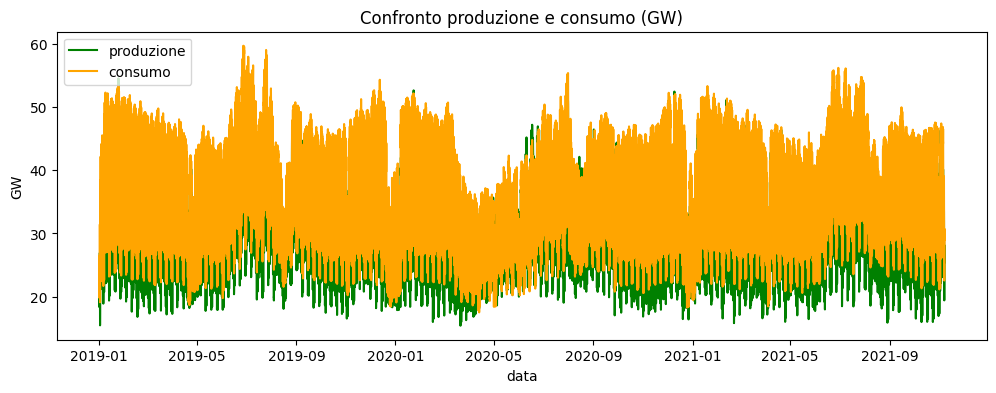

In [ ]:
plt.figure(figsize=(12, 4))
sns.lineplot(data=merged_data['tot_prod(GW)'], color='green', label='produzione')
sns.lineplot(data=merged_data['tot_load(GW)'], color='orange', label='consumo')
plt.title('Confronto produzione e consumo (GW)')
plt.ylabel('GW')
plt.xlabel('data')
plt.legend()
plt.show()

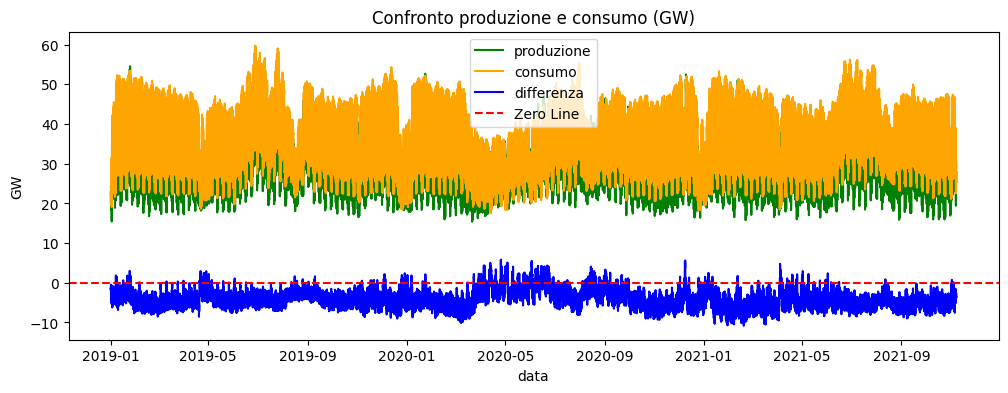

In [ ]:
plt.figure(figsize=(12, 4))
sns.lineplot(data=merged_data['tot_prod(GW)'], color='green', label='produzione')
sns.lineplot(data=merged_data['tot_load(GW)'], color='orange', label='consumo')
sns.lineplot(data=merged_data['diff'], color='blue', label='differenza')
plt.axhline(0, color='red', linestyle='--', label='Zero Line ')
plt.title('Confronto produzione e consumo (GW)')
plt.ylabel('GW')
plt.xlabel('data')
plt.legend()
plt.show()

su tableau realizzate grafiche con zoom con valori aggregati su base giornaliera e settimanale

alcuni grafici in base alle fonti di produzione

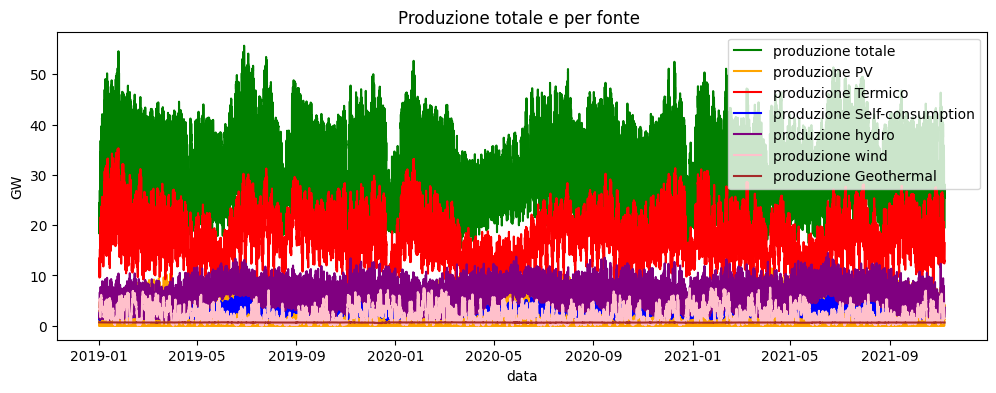

In [ ]:
plt.figure(figsize=(12, 4))
sns.lineplot(data=merged_data['tot_prod(GW)'], color='green', label='produzione totale')
sns.lineplot(data=merged_data['PV_prod(GW)'], color='orange', label='produzione PV')
sns.lineplot(data=merged_data['Thermal_prod(GW)'], color='red', label='produzione Termico')
sns.lineplot(data=merged_data['Self-consumption(GW)'], color='blue', label='produzione Self-consumption')
sns.lineplot(data=merged_data['hydro(GW)'], color='purple', label='produzione hydro')
sns.lineplot(data=merged_data['wind_(GW)'], color='pink', label='produzione wind')
sns.lineplot(data=merged_data['Geothermal(GW)'], color='brown', label='produzione Geothermal')
plt.title('Produzione totale e per fonte ')
plt.ylabel('GW')
plt.xlabel('data')
plt.legend()
plt.show()

vedo alcune situazioni sul bilanciamento per le singole fonti rinnovabili e aggregate


///// NON ESEGUIRE

fonte PV

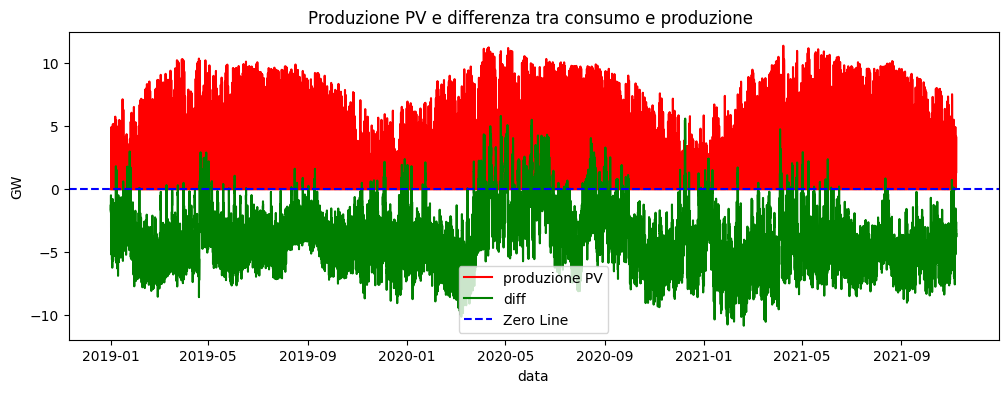

In [ ]:
plt.figure(figsize=(12, 4))
sns.lineplot(data=merged_data['PV_prod(GW)'], color='red', label='produzione PV')
sns.lineplot(data=merged_data['diff'], color='green', label='diff')
plt.axhline(0, color='blue', linestyle='--', label='Zero Line ')
plt.title('Produzione PV e differenza tra consumo e produzione ')
plt.ylabel('GW')
plt.xlabel('data')
plt.legend()
plt.show()

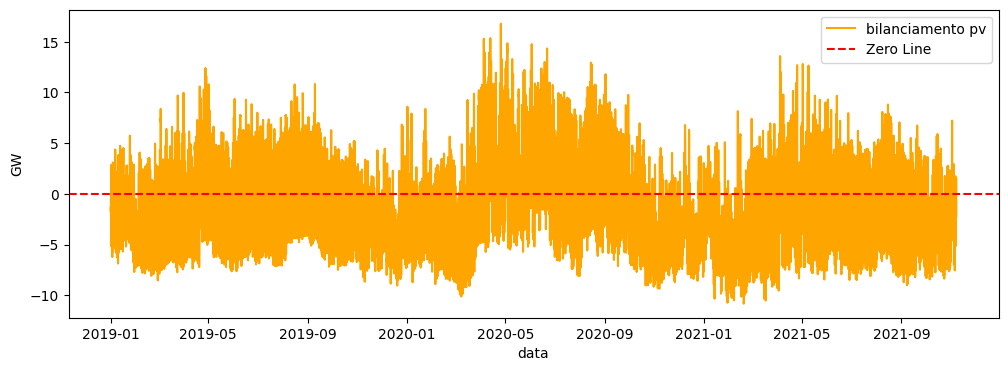

In [ ]:
#se positivo il pv basta a coprire lo scompenso, altrimenti non da solo
plt.figure(figsize=(12, 4))
sns.lineplot(data=merged_data['bilPV'], color='orange', label='bilanciamento pv')
plt.axhline(0, color='red', linestyle='--', label='Zero Line ')
plt.title('')
plt.ylabel('GW')
plt.xlabel('data')
plt.legend()
plt.show()

fonte hydro

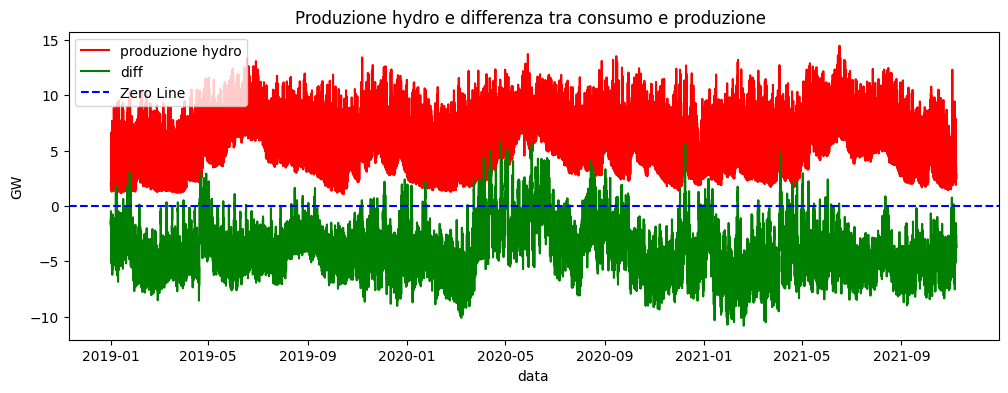

In [ ]:
plt.figure(figsize=(12, 4))
sns.lineplot(data=merged_data['hydro(GW)'], color='red', label='produzione hydro')
sns.lineplot(data=merged_data['diff'], color='green', label='diff')
plt.axhline(0, color='blue', linestyle='--', label='Zero Line ')
plt.title('Produzione hydro e differenza tra consumo e produzione ')
plt.ylabel('GW')
plt.xlabel('data')
plt.legend()
plt.show()


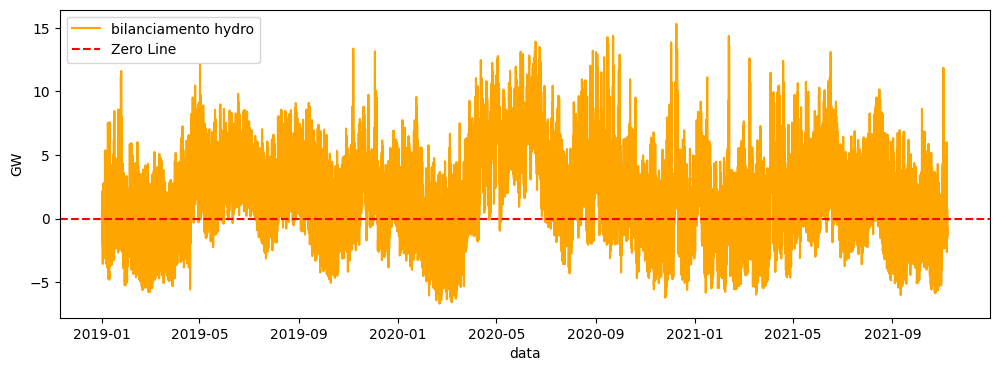

In [ ]:
plt.figure(figsize=(12, 4))
sns.lineplot(data=merged_data['bilHydro'], color='orange', label='bilanciamento hydro')
plt.axhline(0, color='red', linestyle='--', label='Zero Line ')
plt.title('')
plt.ylabel('GW')
plt.xlabel('data')
plt.legend()
plt.show()

fonte geo

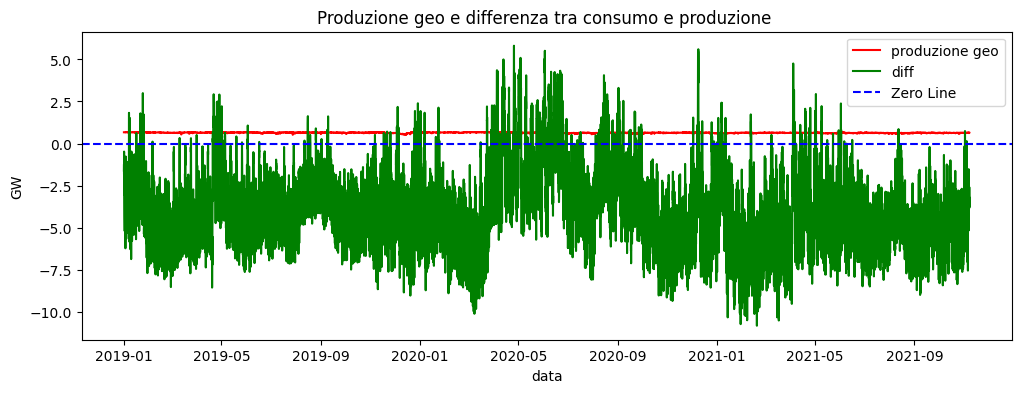

In [ ]:
plt.figure(figsize=(12, 4))
sns.lineplot(data=merged_data['Geothermal(GW)'], color='red', label='produzione geo')
sns.lineplot(data=merged_data['diff'], color='green', label='diff')
plt.axhline(0, color='blue', linestyle='--', label='Zero Line ')
plt.title('Produzione geo e differenza tra consumo e produzione ')
plt.ylabel('GW')
plt.xlabel('data')
plt.legend()
plt.show()

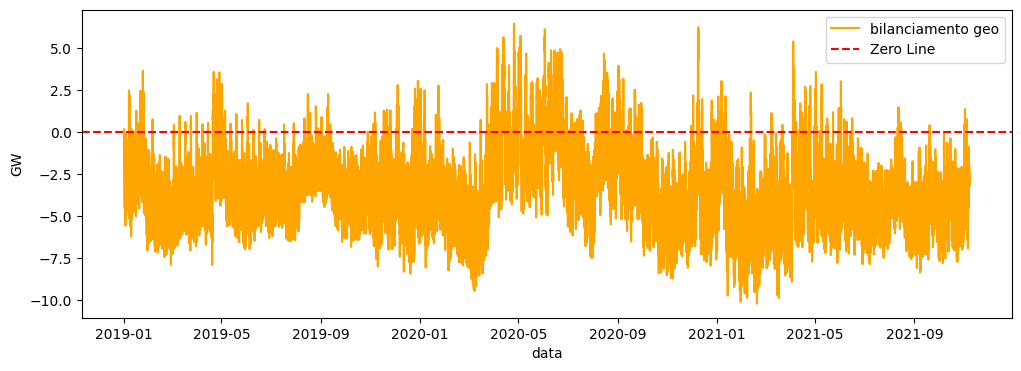

In [ ]:
plt.figure(figsize=(12, 4))
sns.lineplot(data=merged_data['bilGeo'], color='orange', label='bilanciamento geo')
plt.axhline(0, color='red', linestyle='--', label='Zero Line ')
plt.title('')
plt.ylabel('GW')
plt.xlabel('data')
plt.legend()
plt.show()

qui per geo noto che è praticamente costante e quindi il bilanciamento di fatto tira fuori un grafico quasi semplicemente "traslato" verso alto

fonte wind

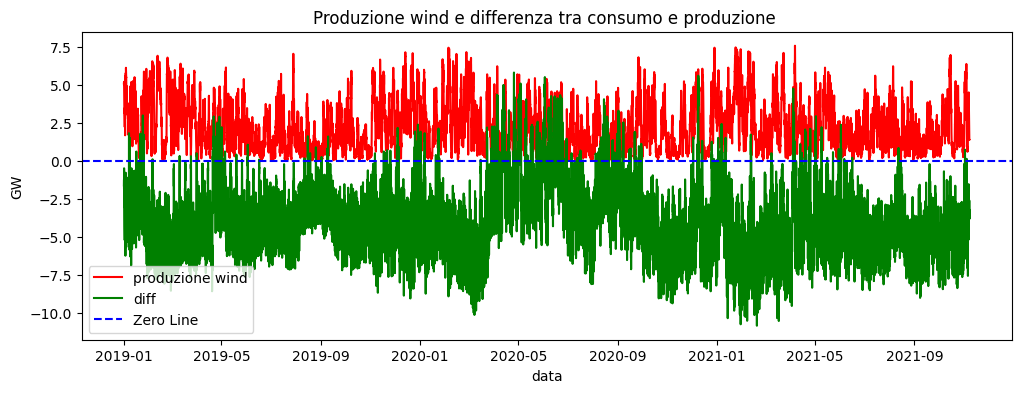

In [ ]:
plt.figure(figsize=(12, 4))
sns.lineplot(data=merged_data['wind_(GW)'], color='red', label='produzione wind')
sns.lineplot(data=merged_data['diff'], color='green', label='diff')
plt.axhline(0, color='blue', linestyle='--', label='Zero Line ')
plt.title('Produzione wind e differenza tra consumo e produzione ')
plt.ylabel('GW')
plt.xlabel('data')
plt.legend()
plt.show()

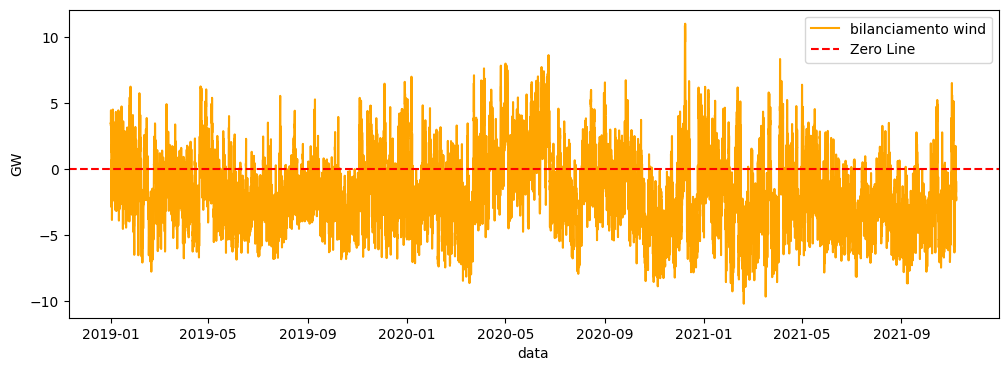

In [ ]:
plt.figure(figsize=(12, 4))
sns.lineplot(data=merged_data['bilWind'], color='orange', label='bilanciamento wind')
plt.axhline(0, color='red', linestyle='--', label='Zero Line ')
plt.title('')
plt.ylabel('GW')
plt.xlabel('data')
plt.legend()
plt.show()

tot fonti rinnovabili

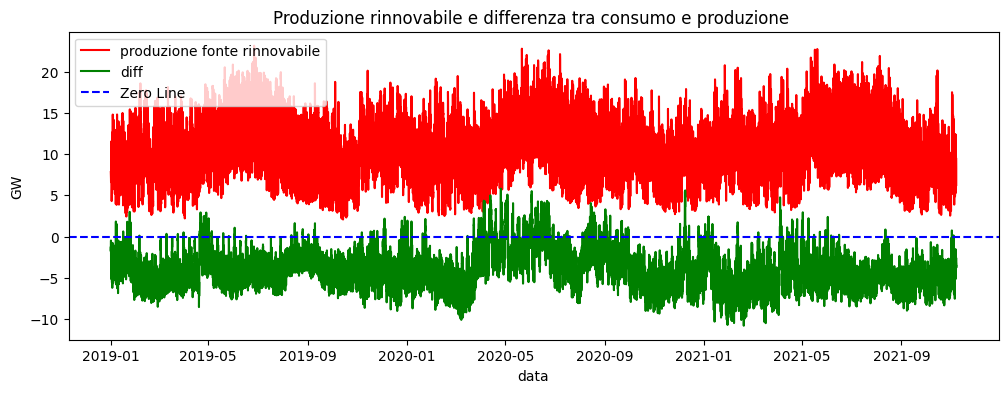

In [ ]:
plt.figure(figsize=(12, 4))
sns.lineplot(data=merged_data['tot_ren(GW)'], color='red', label='produzione fonte rinnovabile')
sns.lineplot(data=merged_data['diff'], color='green', label='diff')
plt.axhline(0, color='blue', linestyle='--', label='Zero Line ')
plt.title('Produzione rinnovabile e differenza tra consumo e produzione ')
plt.ylabel('GW')
plt.xlabel('data')
plt.legend()
plt.show()

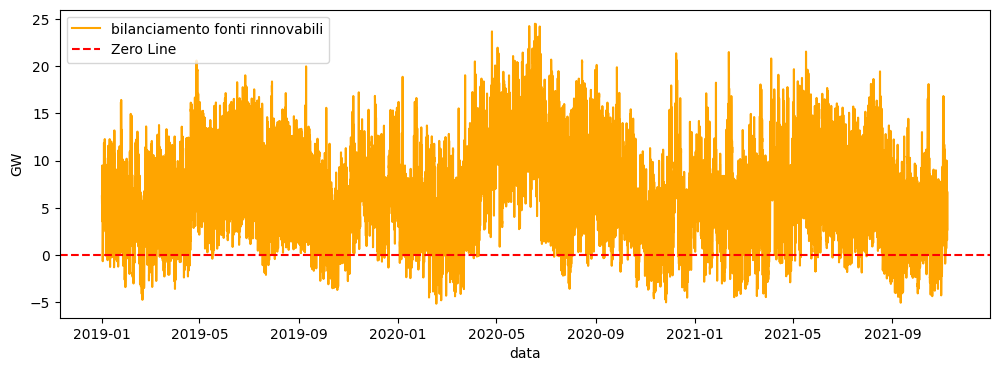

In [ ]:
plt.figure(figsize=(12, 4))
sns.lineplot(data=merged_data['bilTotRen'], color='orange', label='bilanciamento fonti rinnovabili')
plt.axhline(0, color='red', linestyle='--', label='Zero Line ')
plt.title('')
plt.ylabel('GW')
plt.xlabel('data')
plt.legend()
plt.show()

/// FINE NON ESEGUIRE

BILANCIAMENTO CON FONTI RINNOVABILI

vedo se e come le sole fonti rinnovabili possono compensare il carico richiesto dalla rete

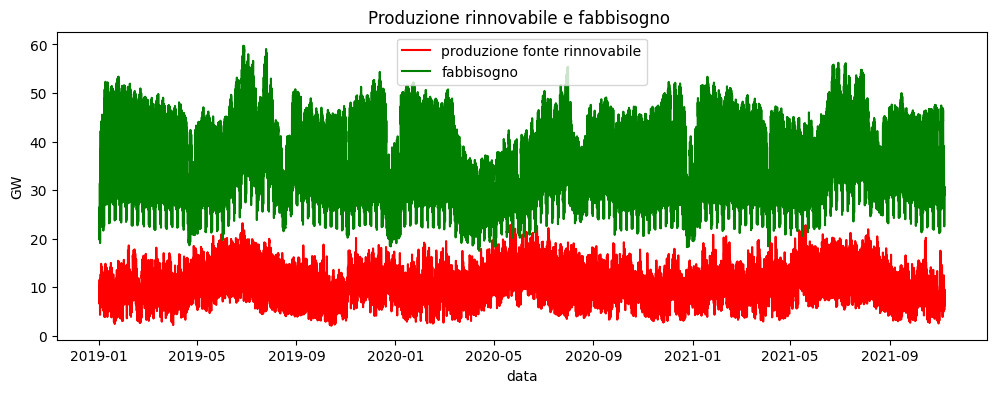

In [ ]:
plt.figure(figsize=(12, 4))
sns.lineplot(data=merged_data['tot_ren(GW)'], color='red', label='produzione fonte rinnovabile')
sns.lineplot(data=merged_data['tot_load(GW)'], color='green', label='fabbisogno')

plt.title('Produzione rinnovabile e fabbisogno ')
plt.ylabel('GW')
plt.xlabel('data')
plt.legend()
plt.show()

vedo chiaramente che le rinnovabili da sole non sono sufficienti

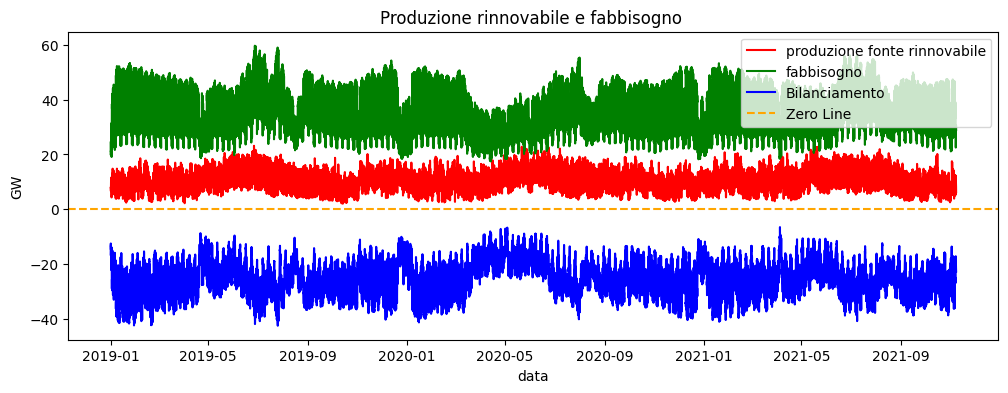

In [ ]:
plt.figure(figsize=(12, 4))
sns.lineplot(data=merged_data['tot_ren(GW)'], color='red', label='produzione fonte rinnovabile')
sns.lineplot(data=merged_data['tot_load(GW)'], color='green', label='fabbisogno')
sns.lineplot(data=merged_data['Bilanciamento_rinnovabili(GW)'], color='blue', label='Bilanciamento')
plt.axhline(0, color='orange', linestyle='--', label='Zero Line ')

plt.title('Produzione rinnovabile e fabbisogno ')
plt.ylabel('GW')
plt.xlabel('data')
plt.legend()
plt.show()

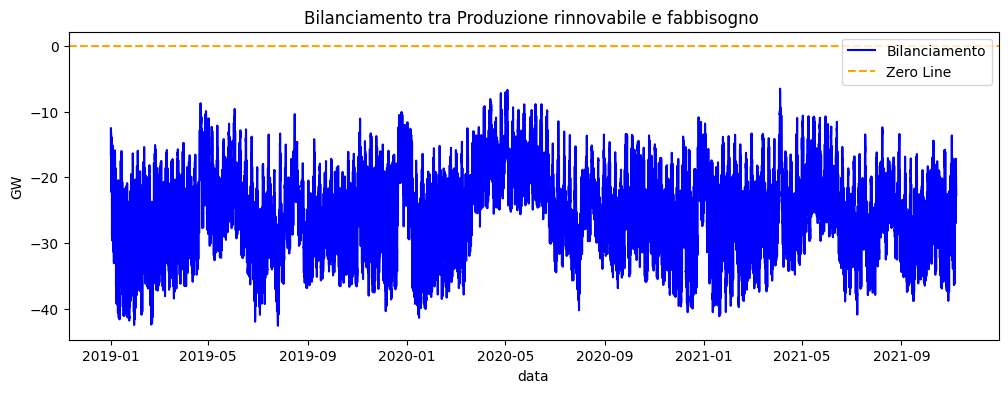

In [ ]:
plt.figure(figsize=(12, 4))
sns.lineplot(data=merged_data['Bilanciamento_rinnovabili(GW)'], color='blue', label='Bilanciamento')
plt.axhline(0, color='orange', linestyle='--', label='Zero Line ')
plt.title('Bilanciamento tra Produzione rinnovabile e fabbisogno ')
plt.ylabel('GW')
plt.xlabel('data')
plt.legend()
plt.show()

vediamo come alcuni incrementi delle fonti rinnovabili possono migliorare la situazione

incremento del 50%

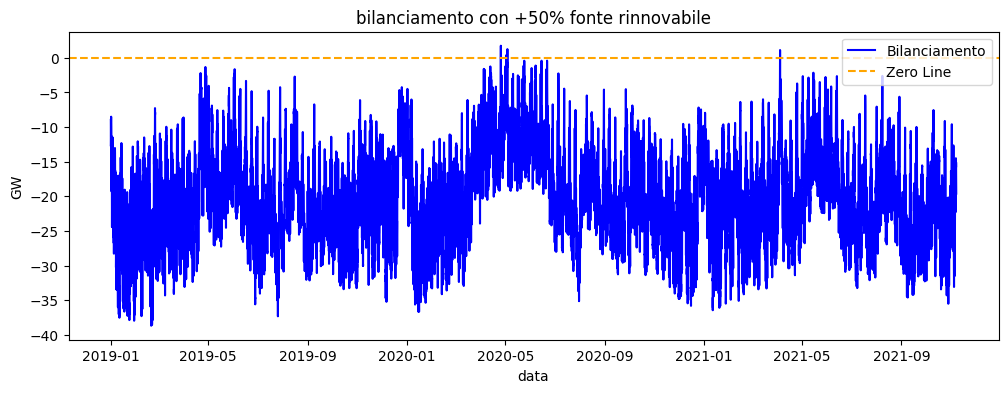

In [ ]:
half_ren=merged_data['tot_ren(GW)']*1.5-merged_data['tot_load(GW)']
plt.figure(figsize=(12, 4))
sns.lineplot(data=half_ren, color='blue', label='Bilanciamento')
plt.axhline(0, color='orange', linestyle='--', label='Zero Line ')
plt.title('bilanciamento con +50% fonte rinnovabile')
plt.ylabel('GW')
plt.xlabel('data')
plt.legend()
plt.show()

raddoppia

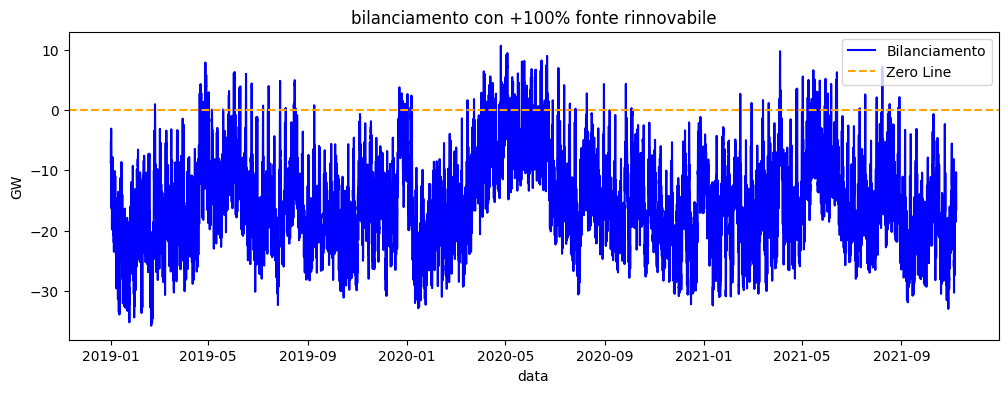

In [ ]:
doppio_ren=2*merged_data['tot_ren(GW)']-merged_data['tot_load(GW)']
plt.figure(figsize=(12, 4))
sns.lineplot(data=doppio_ren, color='blue', label='Bilanciamento')
plt.axhline(0, color='orange', linestyle='--', label='Zero Line ')
plt.title('bilanciamento con +100% fonte rinnovabile')
plt.ylabel('GW')
plt.xlabel('data')
plt.legend()
plt.show()

2.5 x

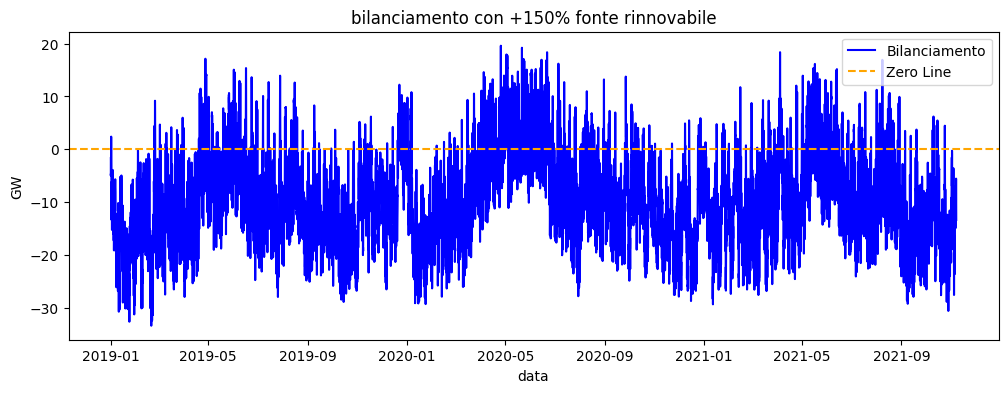

In [ ]:
doppiohalf_ren=2.5*merged_data['tot_ren(GW)']-merged_data['tot_load(GW)']
plt.figure(figsize=(12, 4))
sns.lineplot(data=doppiohalf_ren, color='blue', label='Bilanciamento')
plt.axhline(0, color='orange', linestyle='--', label='Zero Line ')
plt.title('bilanciamento con +150% fonte rinnovabile')
plt.ylabel('GW')
plt.xlabel('data')
plt.legend()
plt.show()

triplica

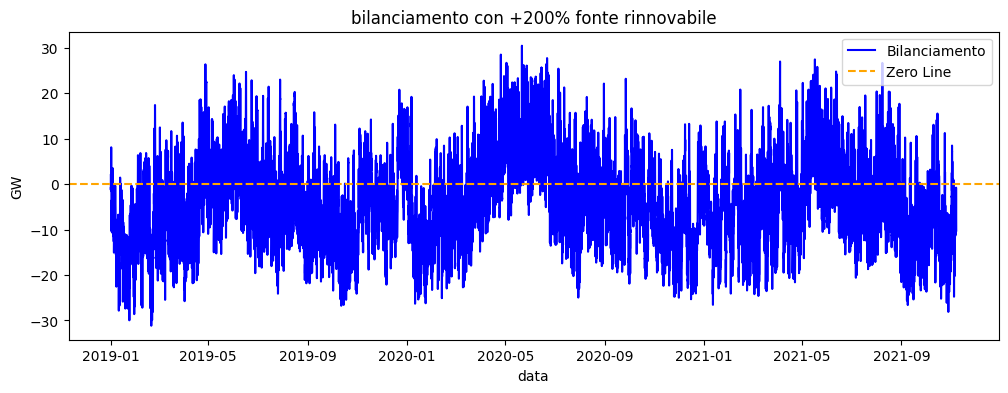

In [ ]:
triplo_ren=3*merged_data['tot_ren(GW)']-merged_data['tot_load(GW)']
plt.figure(figsize=(12, 4))
sns.lineplot(data=triplo_ren, color='blue', label='Bilanciamento')
plt.axhline(0, color='orange', linestyle='--', label='Zero Line ')
plt.title('bilanciamento con +200% fonte rinnovabile')
plt.ylabel('GW')
plt.xlabel('data')
plt.legend()
plt.show()